<a href="https://colab.research.google.com/github/snehasrav25/WhatsbusyInternChallange/blob/master/Question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1GyBWDIRa6Pe8cTTb1qMuwxCSS0JYjipA'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test_restaurant.csv')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=[10,6]
from datetime import datetime
from pandas import Series

In [8]:
#Getting the data
dataset1=pd.read_csv('test_restaurant.csv',index_col=[0],parse_dates=[0],squeeze=True)
dataset1.head()

date
2000-01-01    49.128490
2000-01-02    50.288060
2000-01-03    53.549213
2000-01-04    45.453240
2000-01-05    49.469402
Name: num_visitors, dtype: float64

In [0]:
#Dividing the data to test and train
dataset_train=dataset1[0:3287]
dataset_test=dataset1[3287:3652]

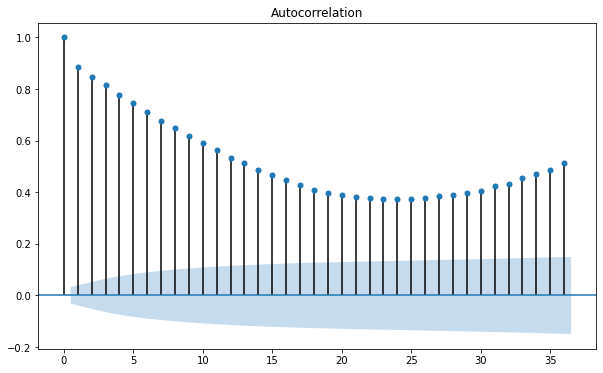

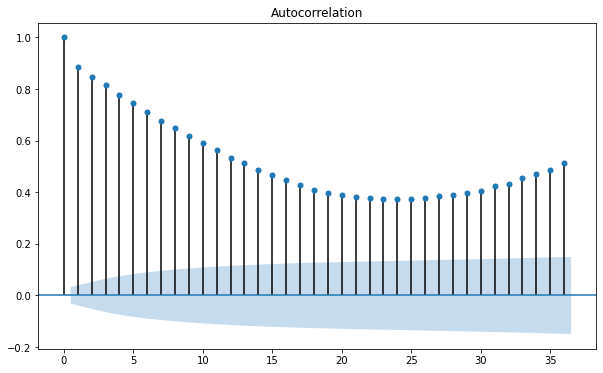

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(dataset1) #to determine the q value in arima model (p,d,q)

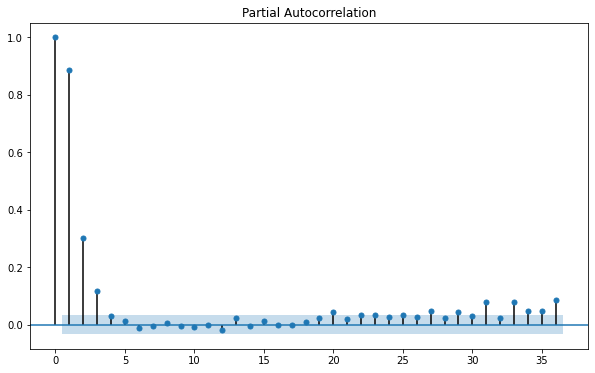

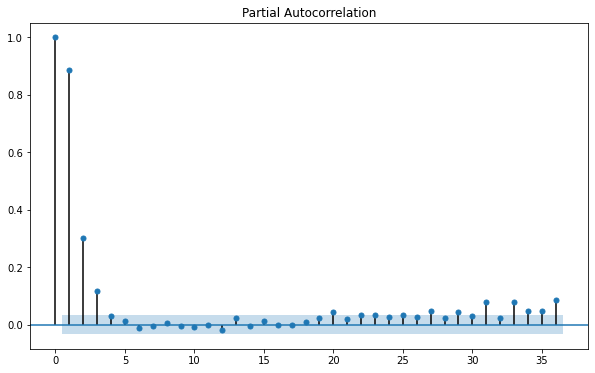

In [35]:
plot_pacf(dataset1) #to determine p value

In [11]:
from statsmodels.tsa.arima_model import ARIMA
#Fitting the arima model
restaurant_model=ARIMA(dataset_train,order=(3,1,1))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [0]:
restaurant_model_fit=restaurant_model.fit()

In [13]:
restaurant_model_fit.aic

19775.901600520578

In [0]:
#Conatins the forecast values
restaurant_forecast=restaurant_model_fit.forecast(steps=364)[0]

In [15]:
from sklearn.metrics import mean_squared_error
#Error value for predicted and actual
np.sqrt(mean_squared_error(dataset_test,restaurant_forecast))

7.705842281436762

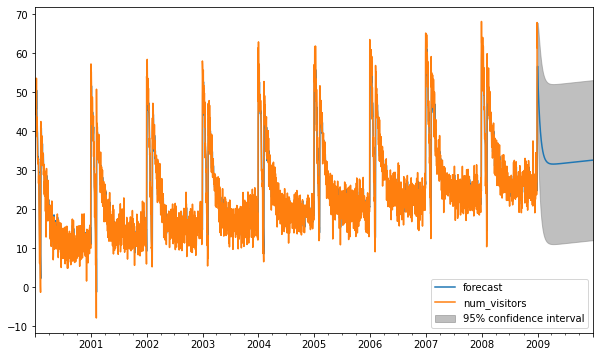

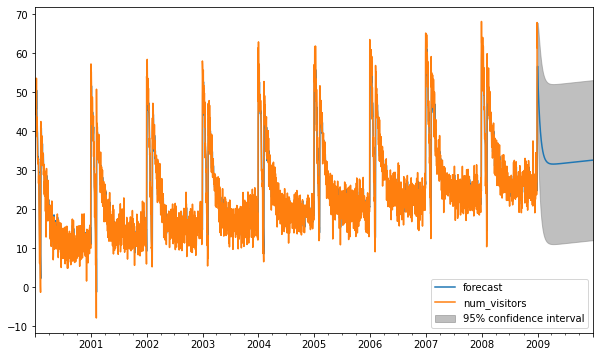

In [16]:
restaurant_model_fit.plot_predict(1,3652) #plotting the model

In [17]:
restaurant_model_fit.forecast(steps=1)

(array([56.21685026]),
 array([4.89220695]),
 array([[46.62830083, 65.80539969]]))

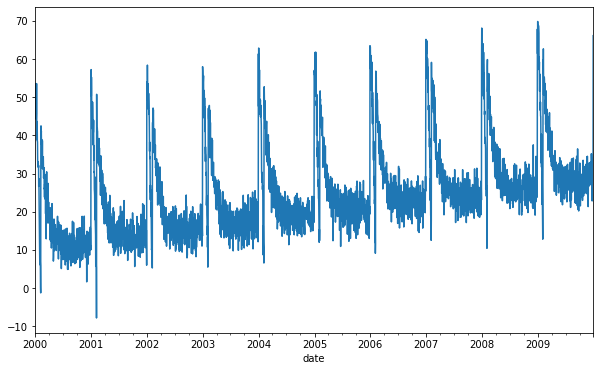

In [18]:
restaurant_mean=dataset1.rolling(window=30).mean()
dataset1.plot()

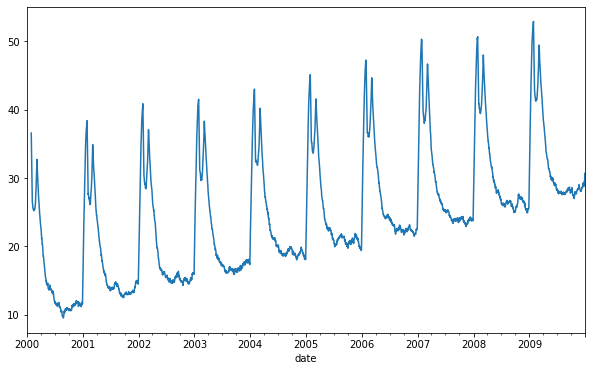

In [19]:
restaurant_mean.plot()

In [0]:
series_value=dataset1.values

In [0]:
value=pd.DataFrame(series_value)

In [0]:
#Naive approach using the previous value to predict the next day value
restaurant_df=pd.concat([value,value.shift(1)],axis=1)

In [25]:
restaurant_df.head()

,0,0
0,49.128490,NaN
1,50.288060,49.128490
2,53.549213,50.288060
3,45.453240,53.549213
4,49.469402,45.453240


In [0]:
restaurant_df.columns=['Actual_visitors','Forecast_visitors']

In [27]:
restaurant_df.head()

,Actual_visitors,Forecast_visitors
0,49.128490,NaN
1,50.288060,49.128490
2,53.549213,50.288060
3,45.453240,53.549213
4,49.469402,45.453240


In [0]:
restaurant_test=restaurant_df[1:]

In [29]:
restaurant_test.head()

,Actual_visitors,Forecast_visitors
1,50.288060,49.128490
2,53.549213,50.288060
3,45.453240,53.549213
4,49.469402,45.453240
5,48.554940,49.469402


In [0]:
#Removing outliers
restaurant_test=restaurant_test[0:3649]

In [0]:
vistors_error=mean_squared_error(restaurant_test.Actual_visitors,restaurant_test.Forecast_visitors)

In [32]:
#Naive approach error is less compared to ARIMA model
vistors_error
np.sqrt(vistors_error)

5.262082351213082

In [33]:
restaurant_df

,Actual_visitors,Forecast_visitors
0,49.128490,NaN
1,50.288060,49.128490
2,53.549213,50.288060
3,45.453240,53.549213
4,49.469402,45.453240
...,...,...
3646,31.124632,28.270082
3647,27.293856,31.124632
3648,30.218498,27.293856
3649,24.751186,30.218498
